In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats

## 3D Graph
### We will be reducing One Dimenion in a 3D Graph as a Basic PCA Demo

In [106]:
# The first simulation would be in 3-D to provide a visualization that PCA works.
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print class1_sample
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

[[ 1.41855894 -1.27355221 -0.70613376  0.61646638 -0.20183043  0.37536933
   0.06205278 -0.01401078  2.0820512  -0.58134866 -0.06207409 -0.15003722
   1.56496726 -0.18303525 -0.15870488 -2.23959537  1.24075783  1.18365269
  -0.52675108  0.68792708]
 [ 0.51592861  2.0517097   2.49528341 -0.13557779 -0.04626049  0.4693083
  -2.07013302  1.36889538 -0.16461873 -1.12748664 -1.81929654 -0.57865804
   0.26194695  0.05701129 -1.18620172 -0.43413256 -0.58002026 -1.28649603
  -0.5705886  -0.92020363]
 [ 1.00659534 -0.56573083  0.29332127 -1.13743276  0.94551403  2.1344537
  -0.84511112  0.35919063 -2.06037859  0.51868356  1.58858403  1.26612099
  -1.10743656 -1.27335437 -0.40144727  1.07714727  1.24852819  0.2905071
  -0.94449113 -1.24512226]]


Populating the interactive namespace from numpy and matplotlib


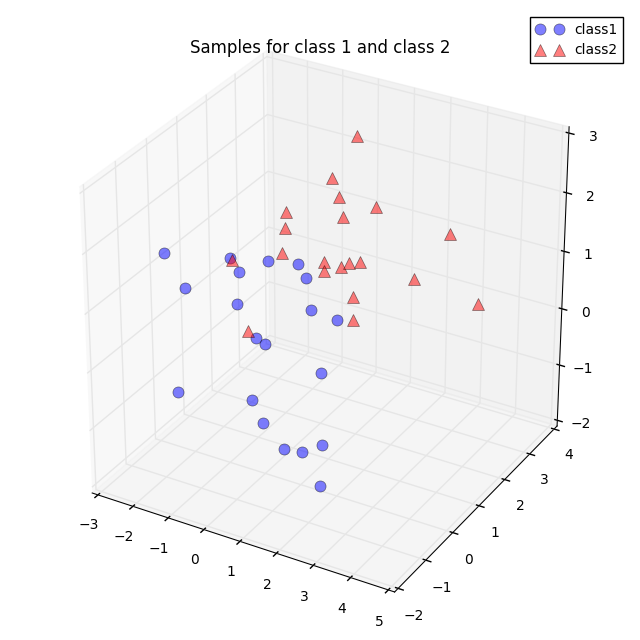

In [15]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

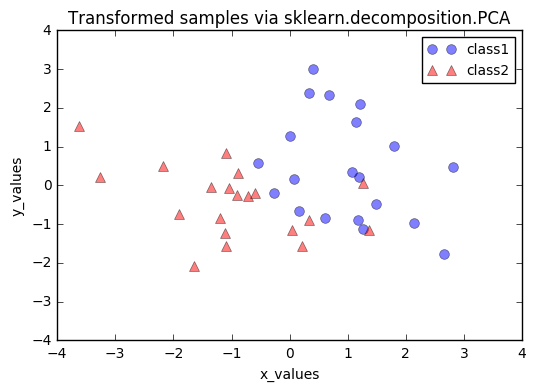

In [22]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

## Random Matrix PCA
We would like to generate a random matrix and run PCA on it to show the amount of dimension as a function of cumulative proportion of variability.

In [87]:
from sklearn.preprocessing import scale
import pandas as pd
data = np.random.rand(15,10)
data = pd.DataFrame(data=data[1:,1:],    # values
              index=data[1:,0],    # 1st column as index
              columns=data[0,1:]) 
print data

          0.049218  0.924298  0.452627  0.460524  0.558643  0.105626  \
0.285134  0.574763  0.885819  0.976869  0.333309  0.133839  0.987338   
0.134937  0.069778  0.185452  0.836714  0.193484  0.618415  0.981266   
0.634121  0.218703  0.686742  0.030623  0.869365  0.642085  0.053464   
0.066102  0.740186  0.405669  0.983660  0.257110  0.001596  0.971521   
0.962641  0.053656  0.146026  0.582448  0.181177  0.646684  0.416990   
0.872148  0.451840  0.424004  0.298916  0.808762  0.946075  0.743621   
0.896977  0.257576  0.062418  0.429646  0.504731  0.220322  0.414024   
0.073630  0.695124  0.089718  0.125926  0.305760  0.124481  0.757412   
0.016475  0.955644  0.615408  0.476989  0.876169  0.343105  0.618930   
0.150669  0.558950  0.353130  0.031800  0.832655  0.326351  0.290713   
0.581829  0.888036  0.556334  0.234032  0.445836  0.432819  0.732613   
0.598626  0.818313  0.949589  0.994200  0.535745  0.945630  0.719300   
0.062479  0.604416  0.135368  0.306667  0.503530  0.053679  0.18

[ 35.17  58.49  76.06  84.35  91.16  96.53  99.01  99.81]


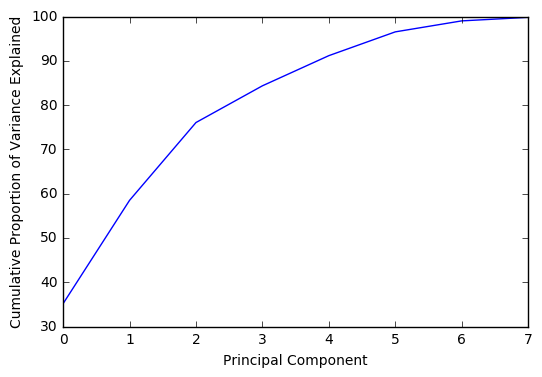

In [111]:
X = data.values
X = scale(X)
pca = PCA(n_components=8)
pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print var1
plt.plot(var1)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")

#Therefore we can say that only 8 out of the 10 dimensions contribute to the variability. The other two can be said as too similar.

#pca = PCA(n_components=6)
#pca.fit(X)
#X1=pca.fit_transform(X)

[[  0.00000000e+00   4.26875839e+01  -4.16216049e+01 ...,   5.37767315e+00
   -4.36191063e+01  -3.24202118e+01]
 [  0.00000000e+00   4.27021294e+01  -4.14958229e+01 ...,   5.48104620e+00
   -4.34563637e+01  -3.23591118e+01]
 [  0.00000000e+00   4.26606216e+01  -4.14280090e+01 ...,   5.48846245e+00
   -4.33893471e+01  -3.22913055e+01]
 ..., 
 [  0.00000000e+00   5.55818176e+00   7.36358166e-02 ...,   2.97115827e+00
   -1.76444924e+00  -2.10357499e+00]
 [  0.00000000e+00   5.46442366e+00  -2.94206440e-02 ...,   2.82475162e+00
   -1.83129156e+00  -2.12265682e+00]
 [  0.00000000e+00   5.33126068e+00  -1.87894136e-01 ...,   2.61322021e+00
   -1.94846594e+00  -2.14896917e+00]]
(19999, 110)


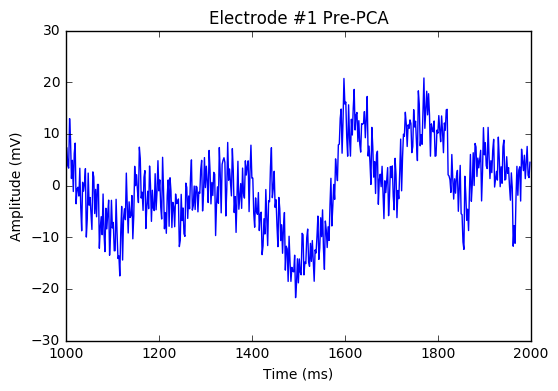

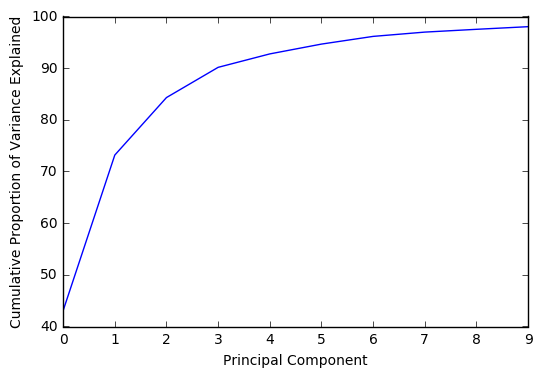

(19999L, 10L)


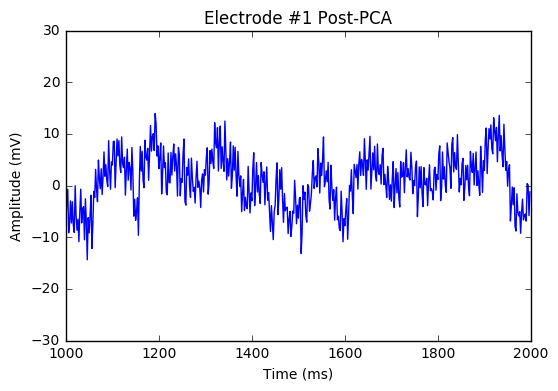

In [132]:
import h5py
f = h5py.File('Documents/full_A00051826_01.mat', 'r')
data1 = np.array((f['result']['data']))
print data1
data_range = data1[500:1000,1];
data1 = pd.DataFrame(data=data1[1:20000,1:],    # values
              index=data1[1:20000,0],    # 1st column as index
              columns=data1[0,1:]) 
print data1.shape
x = range(1000,2000,2)
plt.plot(x, data_range)
plt.title('Electrode #1 Pre-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()

X = data1.values
X = scale(X)
pca = PCA(n_components=10)
pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

Y = pca.fit_transform(X)
print Y.shape

y_range = Y[500:1000, 1];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #1 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-30,30])
plt.show()